In [1]:
pip install faker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 22.1 MB/s eta 0:00:00


In [2]:
import csv
import random
from faker import Faker
fake = Faker()
def generate_health_metrics():
    return {
        "bp": f"{random.randint(90, 140)}/{random.randint(60, 90)}",
        "sugar_level": round(random.uniform(70, 200), 1),
        "cholesterol": round(random.uniform(100, 250), 1),
        "haemoglobin": round(random.uniform(10, 18), 1)
    }
num_records = 10000
csv_file = "patient_records.csv"
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["patient_id", "name", "bp", "sugar_level", "cholesterol", "haemoglobin"])

    for i in range(1, num_records + 1):
        metrics = generate_health_metrics()
        writer.writerow([i, fake.name(), metrics["bp"], metrics["sugar_level"], metrics["cholesterol"], metrics["haemoglobin"]])
print(f"Generated {num_records} patient records and saved to {csv_file}")

Generated 10000 patient records and saved to patient_records.csv


In [3]:
from google.colab import files
files.download("patient_records.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [4]:
pip install pyspark

In [5]:
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean
spark = SparkSession.builder.appName("HealthMonitoring").getOrCreate()
csv_file = "patient_records.csv"
df = spark.read.csv(csv_file, header=True, inferSchema=True)
df = df.withColumn("sugar_level", col("sugar_level").cast("float"))
df = df.withColumn("cholesterol", col("cholesterol").cast("float"))
df = df.withColumn("haemoglobin", col("haemoglobin").cast("float"))
avg_values = df.select(mean("sugar_level").alias("avg_sugar"),
                        mean("cholesterol").alias("avg_cholesterol"),
                        mean("haemoglobin").alias("avg_haemoglobin"))
avg_values.show()
df.write.csv("processed_patient_records.csv", header=True)
print("Processed health values saved successfully.")

+------------------+-----------------+-----------------+
|         avg_sugar|  avg_cholesterol|  avg_haemoglobin|
+------------------+-----------------+-----------------+
|135.33870000228882|175.2316400100708|14.00473999862671|
+------------------+-----------------+-----------------+

Processed health values saved successfully.


+-------+------------------+-------------+------+------------------+------------------+------------------+
|summary|        patient_id|         name|    bp|       sugar_level|       cholesterol|       haemoglobin|
+-------+------------------+-------------+------+------------------+------------------+------------------+
|  count|             10000|        10000| 10000|             10000|             10000|             10000|
|   mean|            5000.5|         NULL|  NULL|135.33870000000024|175.23164000000008|14.004739999999982|
| stddev|2886.8956799071675|         NULL|  NULL| 37.48029406974221| 43.24951966213616|2.3175773231685066|
|    min|                 1|Aaron Aguirre|100/60|              70.0|             100.0|              10.0|
|    max|             10000|      Zoe Lin| 99/90|             200.0|             250.0|              18.0|
+-------+------------------+-------------+------+------------------+------------------+------------------+

+------------------+----------------

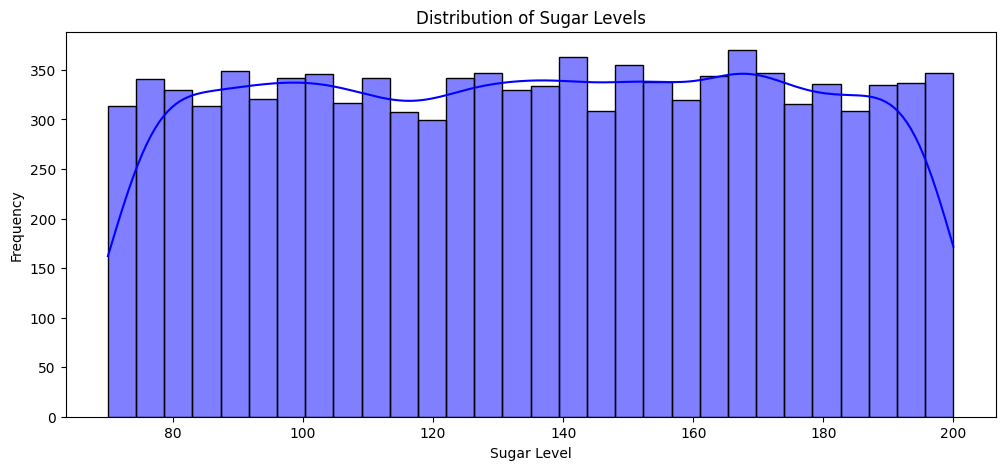

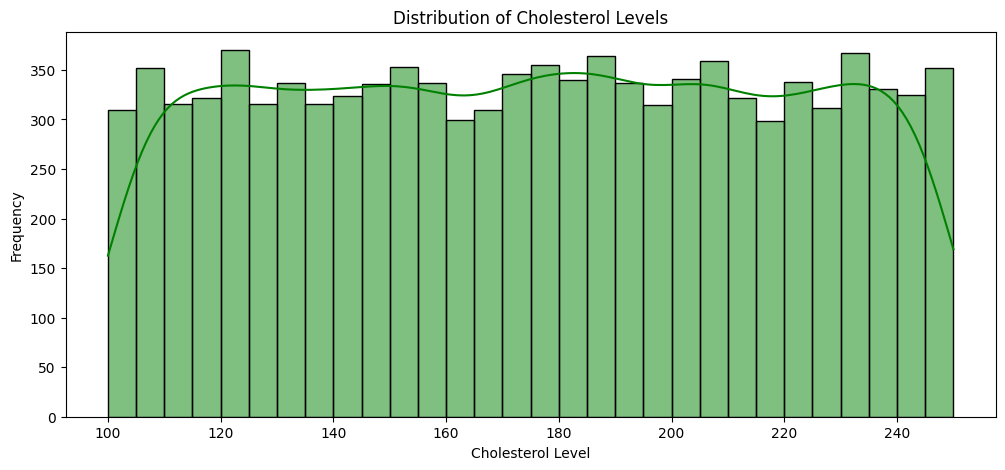

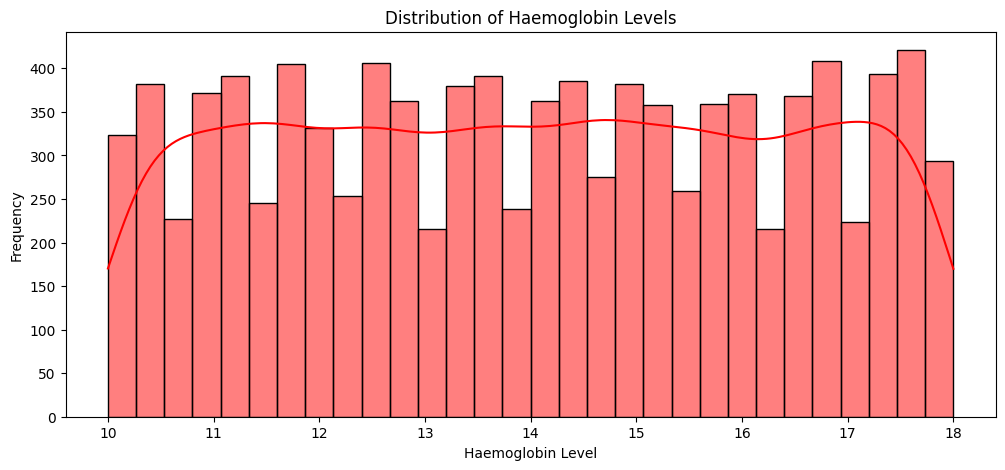

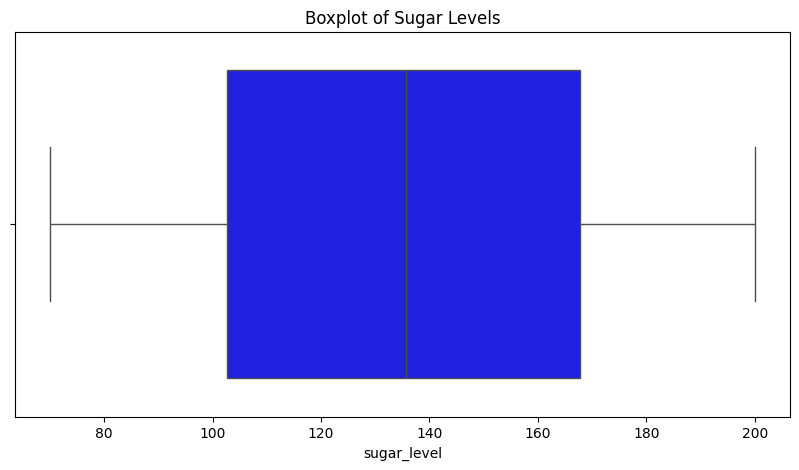

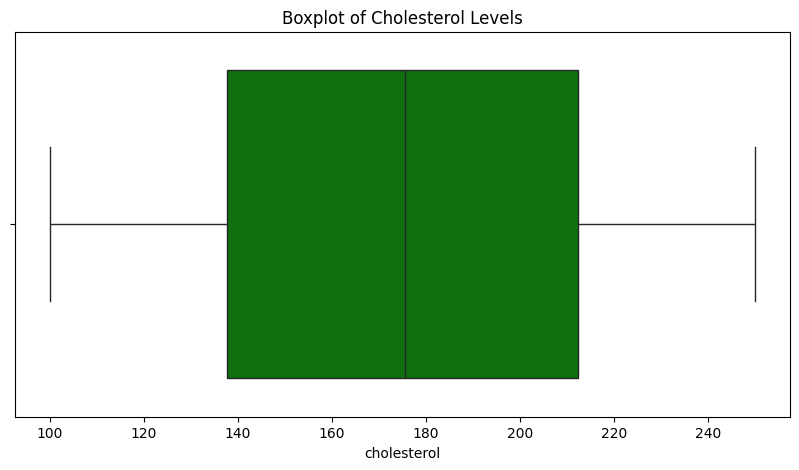

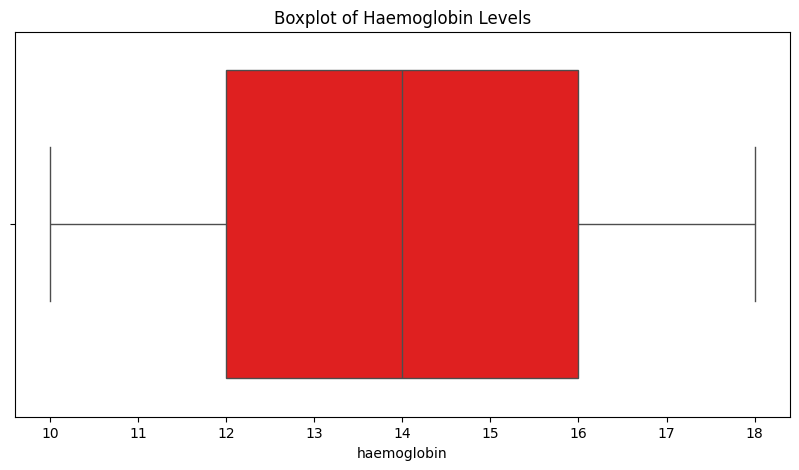

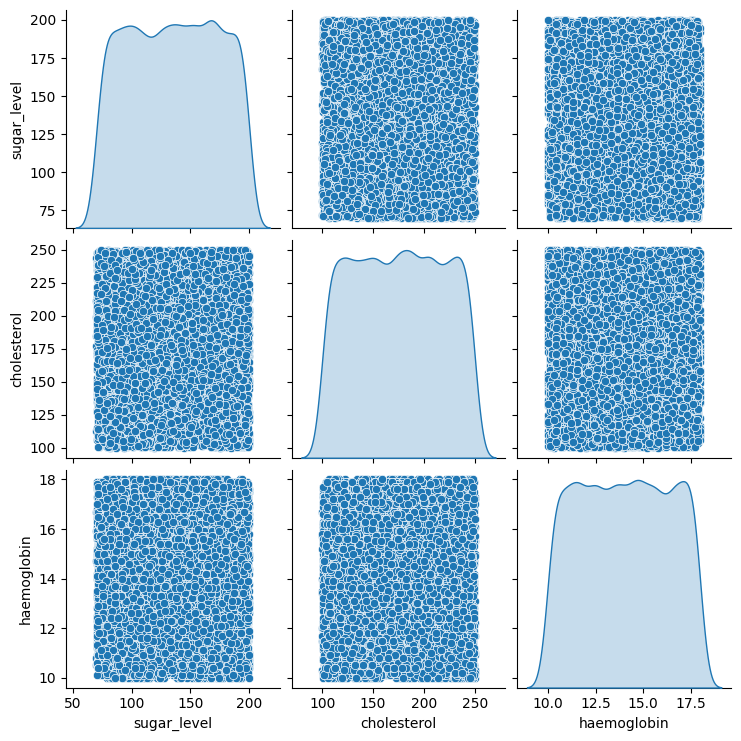

Basic analysis and visualizations completed.


<Figure size 640x480 with 0 Axes>

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, mean, count
import pandas as pd
spark = SparkSession.builder.appName("HealthAnalysis").getOrCreate()
csv_file = "processed_patient_records.csv"
df = spark.read.csv(csv_file, header=True, inferSchema=True)
summary_stats = df.describe()
summary_stats.show()
avg_values = df.select(mean("sugar_level").alias("avg_sugar"),
                        mean("cholesterol").alias("avg_cholesterol"),
                        mean("haemoglobin").alias("avg_haemoglobin"))
avg_values.show()
pandas_df = df.toPandas()
plt.figure(figsize=(12, 5))
sns.histplot(pandas_df["sugar_level"], bins=30, kde=True, color='blue')
plt.title("Distribution of Sugar Levels")
plt.xlabel("Sugar Level")
plt.ylabel("Frequency")
plt.show()
plt.figure(figsize=(12, 5))
sns.histplot(pandas_df["cholesterol"], bins=30, kde=True, color='green')
plt.title("Distribution of Cholesterol Levels")
plt.xlabel("Cholesterol Level")
plt.ylabel("Frequency")
plt.show()
plt.figure(figsize=(12, 5))
sns.histplot(pandas_df["haemoglobin"], bins=30, kde=True, color='red')
plt.title("Distribution of Haemoglobin Levels")
plt.xlabel("Haemoglobin Level")
plt.ylabel("Frequency")
plt.show()
plt.figure(figsize=(10, 5))
sns.boxplot(x=pandas_df["sugar_level"], color='blue')
plt.title("Boxplot of Sugar Levels")
plt.show()
plt.figure(figsize=(10, 5))
sns.boxplot(x=pandas_df["cholesterol"], color='green')
plt.title("Boxplot of Cholesterol Levels")
plt.show()
plt.figure(figsize=(10, 5))
sns.boxplot(x=pandas_df["haemoglobin"], color='red')
plt.title("Boxplot of Haemoglobin Levels")
plt.show()
sns.pairplot(pandas_df, vars=["sugar_level", "cholesterol", "haemoglobin"], diag_kind='kde')
plt.show()
plt.savefig("health_distribution.png")
print("Basic analysis and visualizations completed.")